<a href="https://colab.research.google.com/github/Tirna2/IML/blob/main/Assignemnt_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Load and examine the dataset structure.

import pandas as pd
df = pd.read_excel('/content/Country-data.xlsx')




In [ ]:
print(df.head())  # Display the first few rows


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [ ]:
print(df.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [ ]:
print(df.info)

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

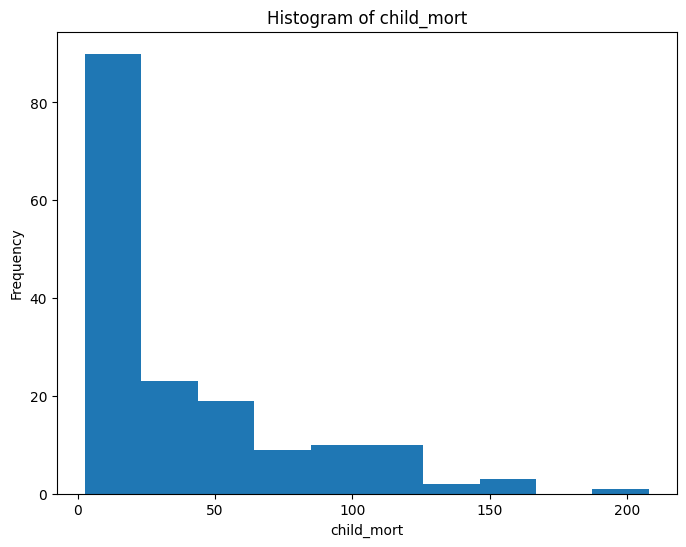

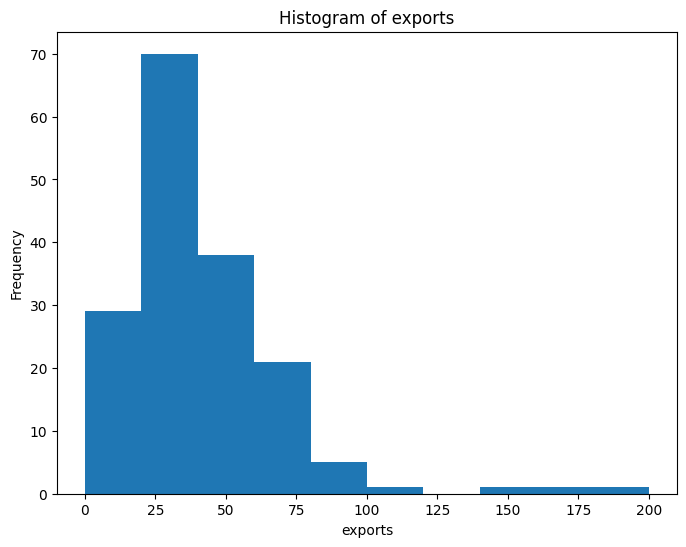

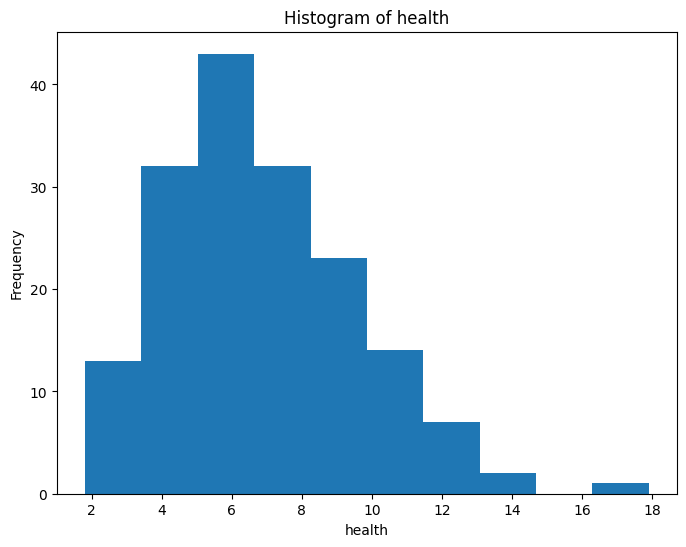

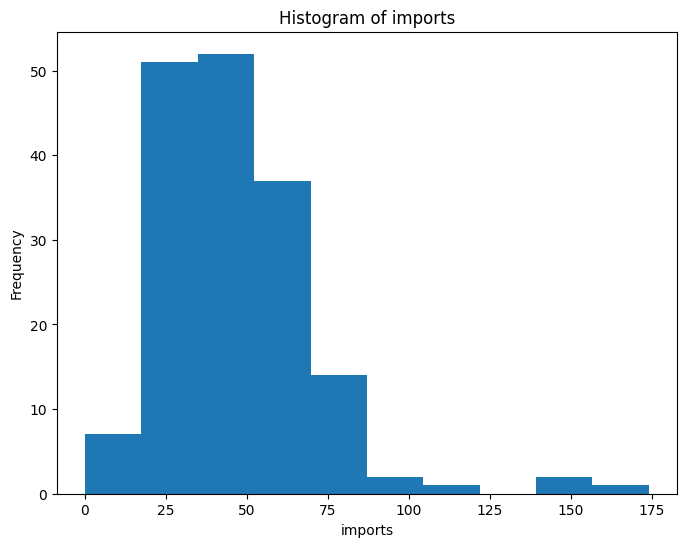

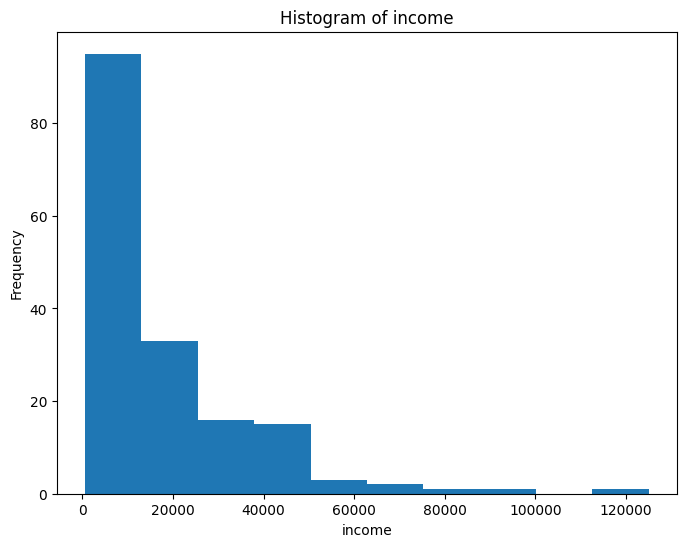

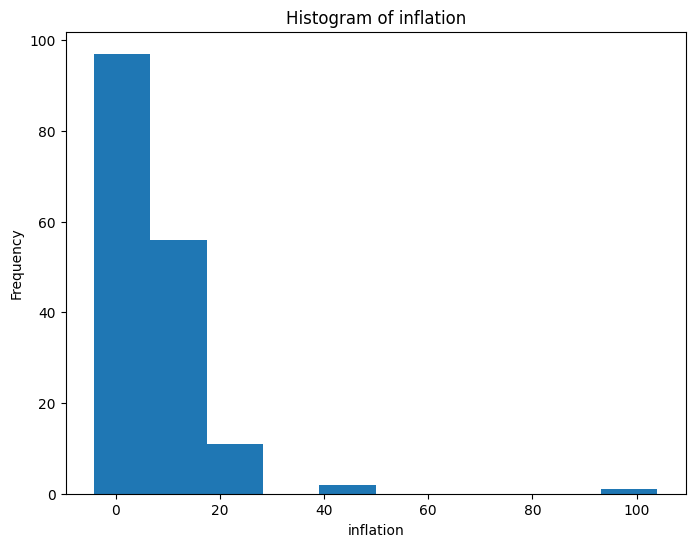

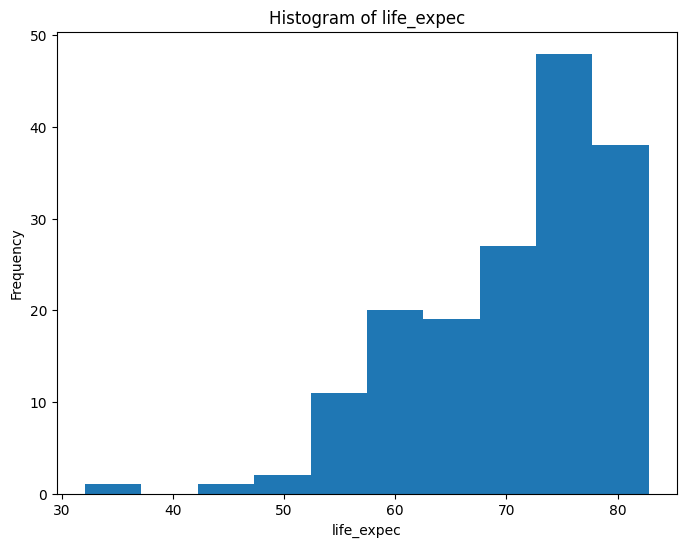

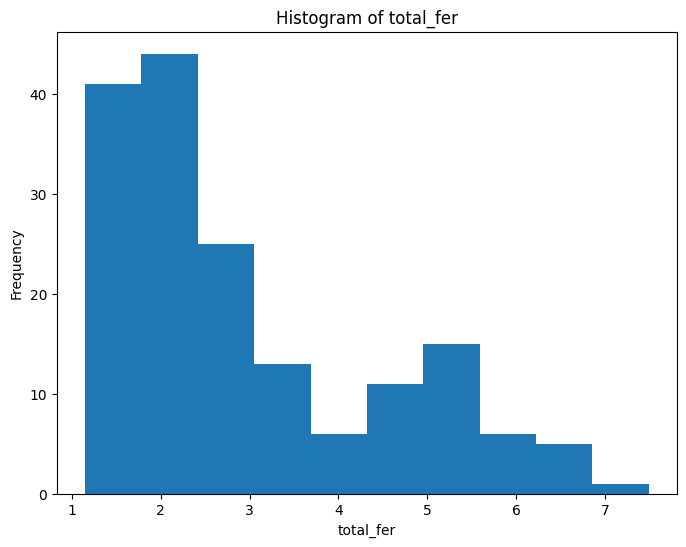

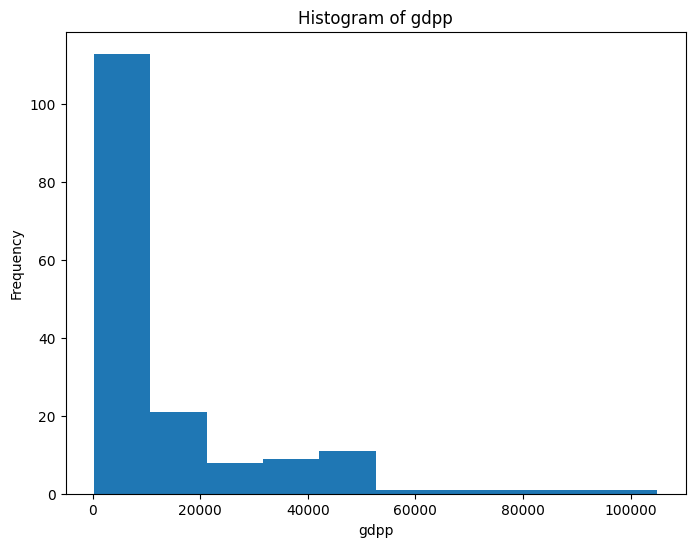

In [ ]:
# prompt: Plot histograms for each individual feature.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded as in the previous code

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {column}")
        plt.show()


In [ ]:
# prompt: Perform feature scaling/standardization (normalize mean to 0 and standard deviation
# to 1 for each feature).

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number'])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Concatenate the scaled numerical features with the original non-numerical features
# if you have any non-numerical columns in the original DataFrame
# if not, just use scaled_df
# Example if you have categorical features:
# categorical_features = df.select_dtypes(exclude=['number'])
# df_scaled = pd.concat([scaled_df, categorical_features], axis=1)


print(scaled_df.head())
print(scaled_df.describe())


   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  
         child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.93

In [ ]:
# prompt: Implement the k-means algorithm from scratch with k = 4:
# • Initialize centroids randomly.
# • Assign countries to the nearest centroid using Euclidean distance.
# • Update centroids by computing the mean of assigned countries.
# • Repeat until convergence or a maximum of 100 iterations is reached.

import numpy as np

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

def kmeans(data, k, max_iterations=100):
    # Initialize centroids randomly
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = np.array([np.argmin([euclidean_distance(data_point, centroid) for centroid in centroids]) for data_point in data])

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Assuming scaled_df contains the numerical data
X = scaled_df.values  # Convert DataFrame to NumPy array

# Apply k-means with k = 4
k = 4
centroids, labels = kmeans(X, k)

print("Centroids:\n", centroids)
print("\nLabels:\n", labels)


Centroids:
 [[ 1.5194917  -0.45316914 -0.38759865 -0.34771711 -0.71580869  0.52645367
  -1.28489522  1.56759448 -0.61966368]
 [-0.44641538 -0.09229382 -0.28721634 -0.21718473 -0.17698757  0.02665364
   0.34865711 -0.53532078 -0.31191855]
 [ 0.09614852  0.01094131  0.32290624  0.84475238 -0.56787407 -0.17442177
  -0.54989968  0.21363159 -0.53672606]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]

Labels:
 [0 1 1 0 1 1 1 3 3 1 1 3 1 1 1 3 1 0 2 1 1 2 1 3 1 0 0 2 0 3 1 0 0 1 1 1 0
 0 0 1 0 1 3 3 3 1 1 1 1 0 0 1 2 3 3 0 0 1 3 0 3 1 1 0 0 2 0 1 3 1 1 1 2 3
 3 3 1 3 2 1 0 2 3 2 2 1 1 2 2 1 1 3 1 0 0 1 1 0 3 0 1 2 2 1 1 1 0 1 2 1 3
 3 0 0 3 1 0 2 1 1 1 1 3 3 1 1 2 2 1 0 1 2 0 3 3 3 2 2 3 3 1 1 0 1 3 3 2 0
 1 0 0 2 1 1 1 0 1 3 3 3 1 1 2 1 2 0 0]


In [ ]:
# prompt: Run the algorithm with five random initializations.

import numpy as np
def kmeans(data, k, max_iterations=100):
    # Initialize centroids randomly
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = np.array([np.argmin([euclidean_distance(data_point, centroid) for centroid in centroids]) for data_point in data])

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Assuming scaled_df contains the numerical data
X = scaled_df.values  # Convert DataFrame to NumPy array

# Apply k-means with k = 4 and five random initializations
k = 4
num_initializations = 5
results = []

for i in range(num_initializations):
    centroids, labels = kmeans(X, k)
    results.append((centroids, labels))

# Now you have five different sets of centroids and labels in the results list.
# You can analyze these results to see how consistent the clustering is across the different initializations.
# For example:
for i, (centroids, labels) in enumerate(results):
    print(f"Initialization {i+1}:")
    print("Centroids:\n", centroids)
    #print("\nLabels:\n", labels) #optional: print labels


Initialization 1:
Centroids:
 [[-0.83001863  0.49132022  0.8030784  -0.01064265  1.64385433 -0.47375735
   1.12419087 -0.76412317  1.85544027]
 [-0.58015507  0.52798236  0.18979249  0.73616765 -0.11270812 -0.36319105
   0.38436199 -0.63033721 -0.21786951]
 [ 1.4556788  -0.4823729  -0.18652038 -0.1529826  -0.73242547  0.40124737
  -1.2946413   1.45619682 -0.6286649 ]
 [-0.24333612 -0.34457592 -0.48845691 -0.5098769  -0.25724356  0.2587898
   0.10063845 -0.23915861 -0.38088718]]
Initialization 2:
Centroids:
 [[-0.82787747  0.72453358  0.7797214   0.22155682  1.68016658 -0.46542738
   1.11922578 -0.79097569  1.87689558]
 [ 0.25247134 -0.18552649  0.0491742   0.42077371 -0.62246676 -0.04880273
  -0.6612336   0.30375803 -0.57289911]
 [-0.55774007  0.03986983 -0.09980552 -0.03642143 -0.05868921 -0.07913054
   0.47179807 -0.60424492 -0.20651304]
 [ 1.50254037 -0.49177263 -0.44217896 -0.4101176  -0.71237207  0.54108603
  -1.26085442  1.52470275 -0.61894364]]
Initialization 3:
Centroids:
 [[ 1.

In [ ]:
# prompt: Implement and explain your convergence criteria.

import numpy as np
def kmeans(data, k, max_iterations=100, tolerance=1e-4): # Added tolerance parameter
    # Initialize centroids randomly
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = np.array([np.argmin([euclidean_distance(data_point, centroid) for centroid in centroids]) for data_point in data])

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence using tolerance
        centroid_shift = np.linalg.norm(new_centroids - centroids) # Calculate the norm of the centroid shift
        if centroid_shift < tolerance: # Check if shift is below tolerance
            break
        centroids = new_centroids

    return centroids, labels


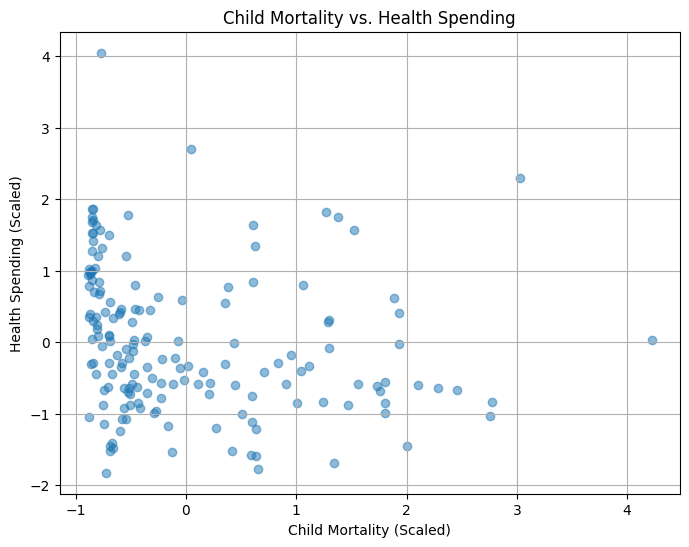

In [ ]:
# prompt: Create 2D scatter plots for:
# • child mort vs. health

import matplotlib.pyplot as plt

# Assuming 'scaled_df' is your DataFrame with scaled features
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['child_mort'], scaled_df['health'], alpha=0.5)
plt.xlabel('Child Mortality (Scaled)')
plt.ylabel('Health Spending (Scaled)')
plt.title('Child Mortality vs. Health Spending')
plt.grid(True)
plt.show()


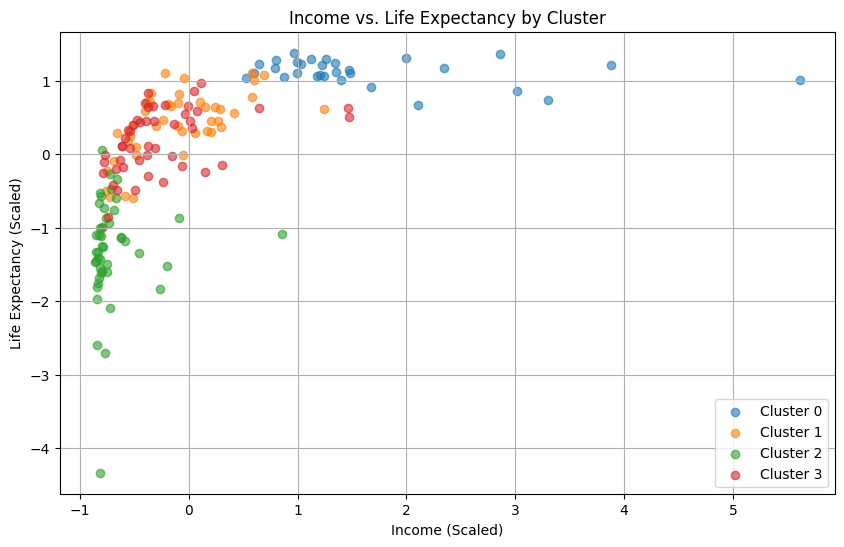

In [ ]:
# prompt: income vs life expectancy

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'scaled_df' is your DataFrame with scaled features and k-means results are available
# You'll need to adapt this based on your actual variable names and clustering results

plt.figure(figsize=(10, 6))

# Assuming 'labels' is from your k-means clustering
for cluster_label in np.unique(labels):
  cluster_data = scaled_df[labels == cluster_label]
  plt.scatter(cluster_data['income'], cluster_data['life_expec'], label=f'Cluster {cluster_label}', alpha=0.6)


# Add centroids to the plot (optional)
# Assuming 'centroids' are the k-means centroids
#plt.scatter(centroids[:, scaled_df.columns.get_loc('income')], centroids[:, scaled_df.columns.get_loc('life_expec')], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Income (Scaled)')
plt.ylabel('Life Expectancy (Scaled)')
plt.title('Income vs. Life Expectancy by Cluster')
plt.legend()
plt.grid(True)
plt.show()


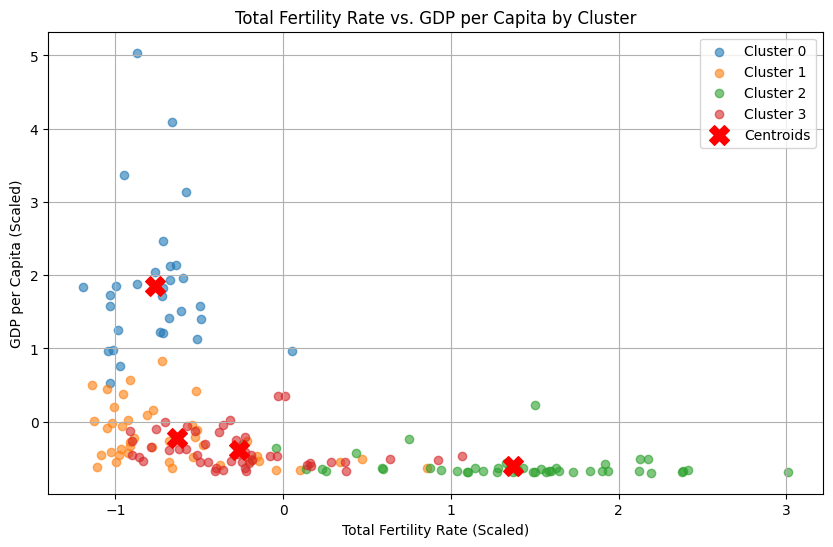

In [ ]:
# prompt: total fertility vs. gdpp

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming the file is uploaded to your Colab environment
# Replace 'Country-data.xlsx' with the actual file name if different
df = pd.read_excel('/content/Country-data.xlsx')

# ... (rest of your existing code) ...

# Assuming 'scaled_df' is your DataFrame with scaled features and k-means results are available
# You'll need to adapt this based on your actual variable names and clustering results

plt.figure(figsize=(10, 6))

# Assuming 'labels' is from your k-means clustering
for cluster_label in np.unique(labels):
  cluster_data = scaled_df[labels == cluster_label]
  plt.scatter(cluster_data['total_fer'], cluster_data['gdpp'], label=f'Cluster {cluster_label}', alpha=0.6)


# Add centroids to the plot (optional)
# Assuming 'centroids' are the k-means centroids
plt.scatter(centroids[:, scaled_df.columns.get_loc('total_fer')], centroids[:, scaled_df.columns.get_loc('gdpp')], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Total Fertility Rate (Scaled)')
plt.ylabel('GDP per Capita (Scaled)')
plt.title('Total Fertility Rate vs. GDP per Capita by Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: For each cluster, analyze and report:
# • Number of countries

import numpy as np
# Assuming 'labels' from k-means clustering and original DataFrame 'df' are available

for cluster_label in np.unique(labels):
    cluster_countries = df[labels == cluster_label]
    num_countries = len(cluster_countries)
    print(f"Cluster {cluster_label}:")
    print(f"- Number of countries: {num_countries}")
    print("-" * 20) # Separator for better readability


Cluster 0:
- Number of countries: 47
--------------------
Cluster 1:
- Number of countries: 85
--------------------
Cluster 2:
- Number of countries: 32
--------------------
Cluster 3:
- Number of countries: 3
--------------------


In [ ]:
# prompt: For each cluster, analyze and report: Average values of key indicators

import numpy as np
# Assuming 'labels' from k-means clustering and original DataFrame 'df' are available

for cluster_label in np.unique(labels):
    cluster_data = df[labels == cluster_label]
    # Select only numerical features for calculating the mean
    numerical_cluster_data = cluster_data.select_dtypes(include=['number'])
    averages = numerical_cluster_data.mean() # Calculate the mean for numerical data only
    print(f"Cluster {cluster_label}:")
    print(averages)
    print("-" * 20) # Separator for better readability

Cluster 0:
child_mort      92.961702
exports         29.151277
health           6.388511
imports         42.323404
income        3942.404255
inflation       12.019681
life_expec      59.187234
total_fer        5.008085
gdpp          1922.382979
dtype: float64
--------------------
Cluster 1:
child_mort       21.690588
exports          41.073988
health            6.197059
imports          47.914893
income        12671.411765
inflation         7.609341
life_expec       72.871765
total_fer         2.300706
gdpp           6519.552941
dtype: float64
--------------------
Cluster 2:
child_mort        5.181250
exports          46.118750
health            9.088438
imports          40.584375
income        44021.875000
inflation         2.513844
life_expec       80.081250
total_fer         1.788437
gdpp          42118.750000
dtype: float64
--------------------
Cluster 3:
child_mort        4.133333
exports         176.000000
health            6.793333
imports         156.666667
income        64033.

In [ ]:
# prompt: Characteristic features of the cluster

import numpy as np
# Assuming 'labels' from k-means clustering and original DataFrame 'df' are available

for cluster_label in np.unique(labels):
    cluster_data = df[labels == cluster_label]
    # Select only numerical features for calculating the mean
    numerical_cluster_data = cluster_data.select_dtypes(include=['number'])
    averages = numerical_cluster_data.mean() # Calculate the mean for numerical data only
    print(f"Cluster {cluster_label}:")
    print(averages)
    print("-" * 20) # Separator for better readability


Cluster 0:
child_mort      92.961702
exports         29.151277
health           6.388511
imports         42.323404
income        3942.404255
inflation       12.019681
life_expec      59.187234
total_fer        5.008085
gdpp          1922.382979
dtype: float64
--------------------
Cluster 1:
child_mort       21.690588
exports          41.073988
health            6.197059
imports          47.914893
income        12671.411765
inflation         7.609341
life_expec       72.871765
total_fer         2.300706
gdpp           6519.552941
dtype: float64
--------------------
Cluster 2:
child_mort        5.181250
exports          46.118750
health            9.088438
imports          40.584375
income        44021.875000
inflation         2.513844
life_expec       80.081250
total_fer         1.788437
gdpp          42118.750000
dtype: float64
--------------------
Cluster 3:
child_mort        4.133333
exports         176.000000
health            6.793333
imports         156.666667
income        64033.

2. Programming - Development Aid Analysis Using PCA
and Clustering


In [ ]:
# prompt: Implement PCA on the standardized dataset:
# • Calculate the covariance matrix.

import numpy as np
# Calculate the covariance matrix
covariance_matrix = np.cov(scaled_df.T)

print("Covariance Matrix:\n", covariance_matrix)


Covariance Matrix:
 [[ 1.0060241  -0.32000945 -0.2016093  -0.12797725 -0.52747354  0.29001277
  -0.89201752  0.85358942 -0.485942  ]
 [-0.32000945  1.0060241  -0.11509761  0.74182289  0.51989676 -0.10794074
   0.3182181  -0.32193832  0.42124719]
 [-0.2016093  -0.11509761  1.0060241   0.09629328  0.1303592  -0.2569142
   0.21196135 -0.19785877  0.34804965]
 [-0.12797725  0.74182289  0.09629328  1.0060241   0.12314364 -0.2484822
   0.05471819 -0.16000656  0.11619394]
 [-0.52747354  0.51989676  0.1303592   0.12314364  1.0060241  -0.14864609
   0.61564899 -0.50486319  0.90096644]
 [ 0.29001277 -0.10794074 -0.2569142  -0.2484822  -0.14864609  1.0060241
  -0.24114897  0.31883023 -0.22296618]
 [-0.89201752  0.3182181   0.21196135  0.05471819  0.61564899 -0.24114897
   1.0060241  -0.76545827  0.60370413]
 [ 0.85358942 -0.32193832 -0.19785877 -0.16000656 -0.50486319  0.31883023
  -0.76545827  1.0060241  -0.45765069]
 [-0.485942    0.42124719  0.34804965  0.11619394  0.90096644 -0.22296618
   0.

In [ ]:
# prompt: Compute all the eigenvalues and eigenvectors.

import numpy as np
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Eigenvalues:
 [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.06727787 0.08884738 0.1141221 ]

Eigenvectors:
 [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.3275418  -0.68274306 -0.07948854]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
   0.12308207 -0.01419742 -0.70730269]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.11308797  0.07249683 -0.24983051]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
  -0.09903717 -0.02894642  0.59218953]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
  -0.61298247  0.35262369  0.09556237]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.02523614 -0.01153775  0.10463252]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
  -0.29403981 -0.50466425  0.01848639]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
   0.

In [ ]:
# prompt: Sort the principal components by eigenvalue in descending order.

import numpy as np
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues (sorted):\n", eigenvalues)
print("\nEigenvectors (sorted):\n", eigenvectors)


Eigenvalues (sorted):
 [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]

Eigenvectors (sorted):
 [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.07948854 -0.68274306 -0.3275418 ]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
  -0.70730269 -0.01419742  0.12308207]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.24983051  0.07249683 -0.11308797]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
   0.59218953 -0.02894642 -0.09903717]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
   0.09556237  0.35262369 -0.61298247]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.10463252 -0.01153775  0.02523614]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
   0.01848639 -0.50466425 -0.29403981]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221

In [ ]:
# prompt: Compute the explained variance ratio for each component (ratio of each eigenvalue to
# the sum of all eigenvalues).

import numpy as np
# Compute the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("Explained Variance Ratio:\n", explained_variance_ratio)


Explained Variance Ratio:
 [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [ ]:
# prompt: Determine the minimum number of principal components needed to explain at least
# 80% of the variability.

import numpy as np
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the minimum number of principal components to explain at least 80% of the variance
n_components = np.argmax(cumulative_variance >= 0.8) + 1

print(f"Minimum number of principal components to explain 80% variance: {n_components}")


Minimum number of principal components to explain 80% variance: 4


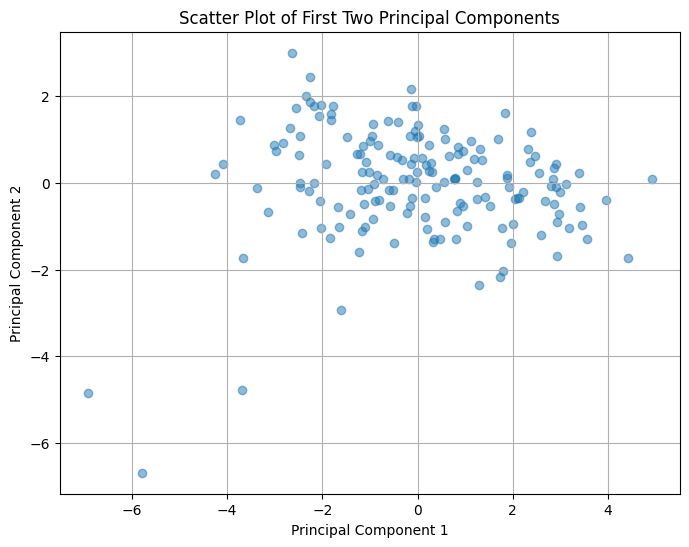

In [ ]:
# prompt: Create scatter plots of the first two principal components.

import matplotlib.pyplot as plt
# Assuming 'eigenvectors' and 'scaled_df' are available from the previous code

# Select the first two principal components
principal_components = eigenvectors[:, :2]

# Project the data onto the principal components
projected_data = scaled_df.values @ principal_components

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(True)
plt.show()


KMeans Labels:
 [2 1 1 2 1 1 1 3 3 1 1 1 1 1 1 3 1 2 1 1 1 1 1 3 1 2 2 1 2 3 1 2 2 1 1 1 2
 2 2 1 2 1 3 3 3 1 1 1 1 2 2 1 1 3 3 2 2 1 3 2 3 1 1 2 2 1 2 1 3 2 1 1 1 3
 3 3 1 3 1 1 2 2 3 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 2 2 2 3
 3 2 2 3 1 2 1 1 1 1 1 3 3 1 1 2 1 1 2 1 1 2 0 3 3 1 1 3 3 1 1 2 1 3 3 2 2
 1 2 2 1 1 1 1 2 1 3 3 3 1 1 1 1 1 2 2]

KMeans Centroids:
 [[-5.46022462 -5.43247334]
 [-0.22636596  0.10138293]
 [ 2.43865755 -0.34887168]
 [-2.55187963  0.76647169]]


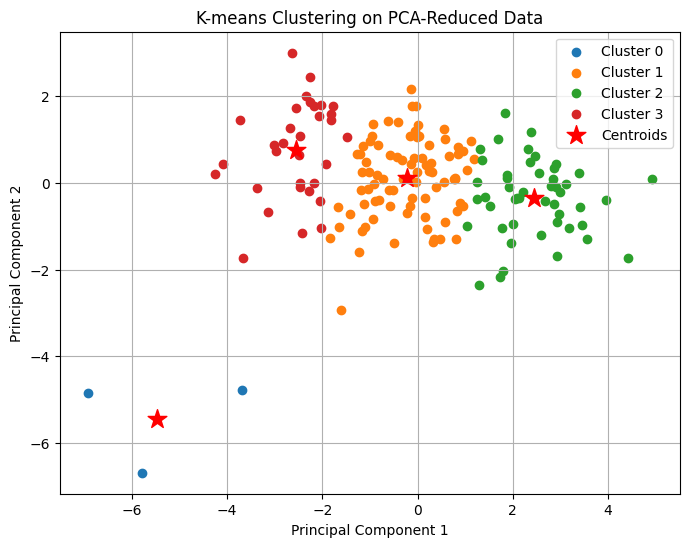

In [ ]:
# prompt: Apply k-means clustering (k = 4) on the 2D reduced data.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'projected_data' is the 2D reduced data from PCA
kmeans = KMeans(n_clusters=4, random_state=0) #random_state for reproducibility
kmeans.fit(projected_data)
labels_kmeans = kmeans.labels_
centroids_kmeans = kmeans.cluster_centers_

print("KMeans Labels:\n", labels_kmeans)
print("\nKMeans Centroids:\n", centroids_kmeans)

# Now you can use 'labels_kmeans' for further analysis or visualization
# For instance, to visualize the clusters:
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(projected_data[labels_kmeans == i, 0], projected_data[labels_kmeans == i, 1], label=f"Cluster {i}")
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.show()


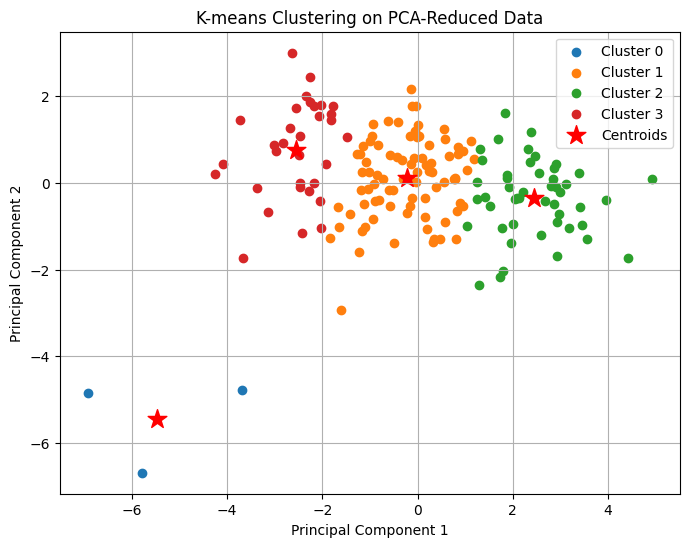

In [ ]:
# prompt: Show a 2D plot for the dimension-reduced data, colour-coded by cluster assignment.

import matplotlib.pyplot as plt
# Assuming 'projected_data' and 'labels_kmeans' are available from the previous code

plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(projected_data[labels_kmeans == i, 0], projected_data[labels_kmeans == i, 1], label=f"Cluster {i}")
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.show()


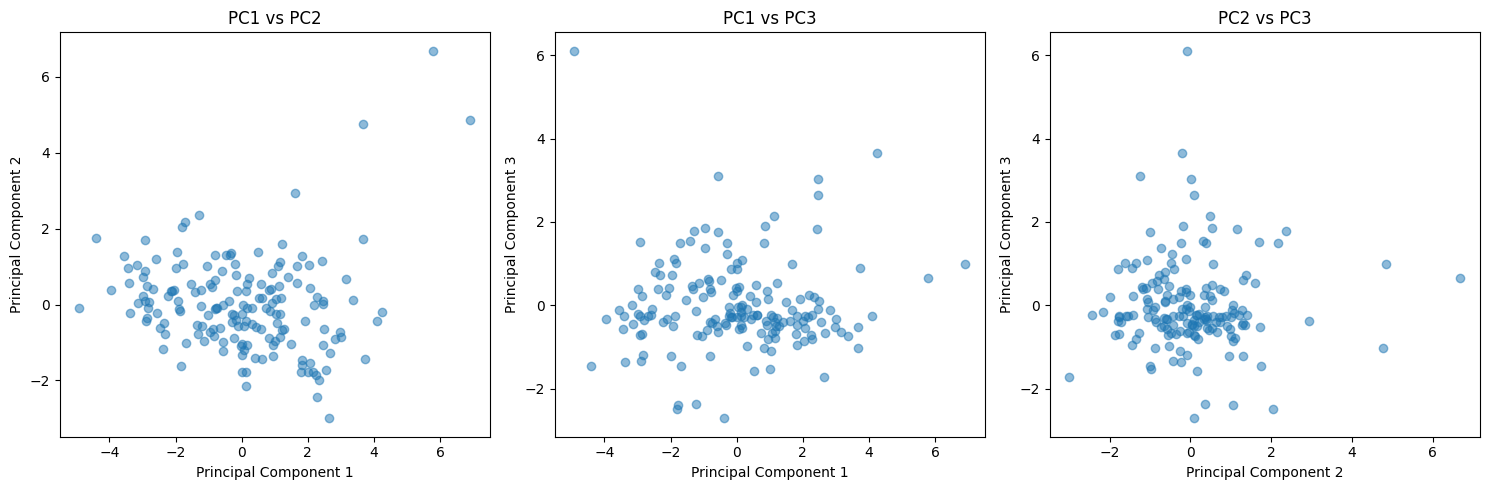

In [ ]:
# prompt: Create pairwise scatter plots of the first three principal components.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'scaled_df' is your DataFrame with scaled features
pca = PCA(n_components=3)  # Reduce to 3 principal components
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Pairwise scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2')

plt.subplot(1, 3, 2)
plt.scatter(principal_df['PC1'], principal_df['PC3'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PC1 vs PC3')

plt.subplot(1, 3, 3)
plt.scatter(principal_df['PC2'], principal_df['PC3'], alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PC2 vs PC3')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Apply k-means clustering (k = 4) on the 3D reduced data.

# Assuming 'principal_df' (3D reduced data) and 'KMeans' are already imported and available.

kmeans_3d = KMeans(n_clusters=4, random_state=0)
kmeans_3d.fit(principal_df)
labels_3d = kmeans_3d.labels_
centroids_3d = kmeans_3d.cluster_centers_

print("KMeans Labels (3D):\n", labels_3d)
print("\nKMeans Centroids (3D):\n", centroids_3d)


KMeans Labels (3D):
 [3 1 1 3 1 1 1 2 2 1 2 2 1 1 1 2 1 3 1 1 2 1 1 2 1 3 3 1 3 2 1 3 3 1 1 1 3
 3 3 2 3 2 2 2 2 1 1 1 1 3 3 2 1 2 2 3 3 1 2 3 2 1 1 3 3 1 3 2 2 3 1 1 1 2
 2 2 1 2 1 1 3 3 2 1 3 1 1 3 3 1 1 0 1 3 3 1 1 3 0 3 1 1 1 1 1 1 3 3 3 1 2
 2 3 3 2 1 3 1 1 1 1 2 2 2 1 1 3 1 1 3 1 1 3 0 2 2 1 1 2 2 1 1 3 1 2 2 3 3
 1 3 3 1 1 1 1 3 1 2 2 2 1 1 1 1 1 3 3]

KMeans Centroids (3D):
 [[ 5.46022462  5.43247334  0.21164795]
 [ 0.09051016 -0.09971398  0.04844837]
 [ 2.30996291 -0.65385831 -0.0571821 ]
 [-2.46273346  0.37308275 -0.04421669]]


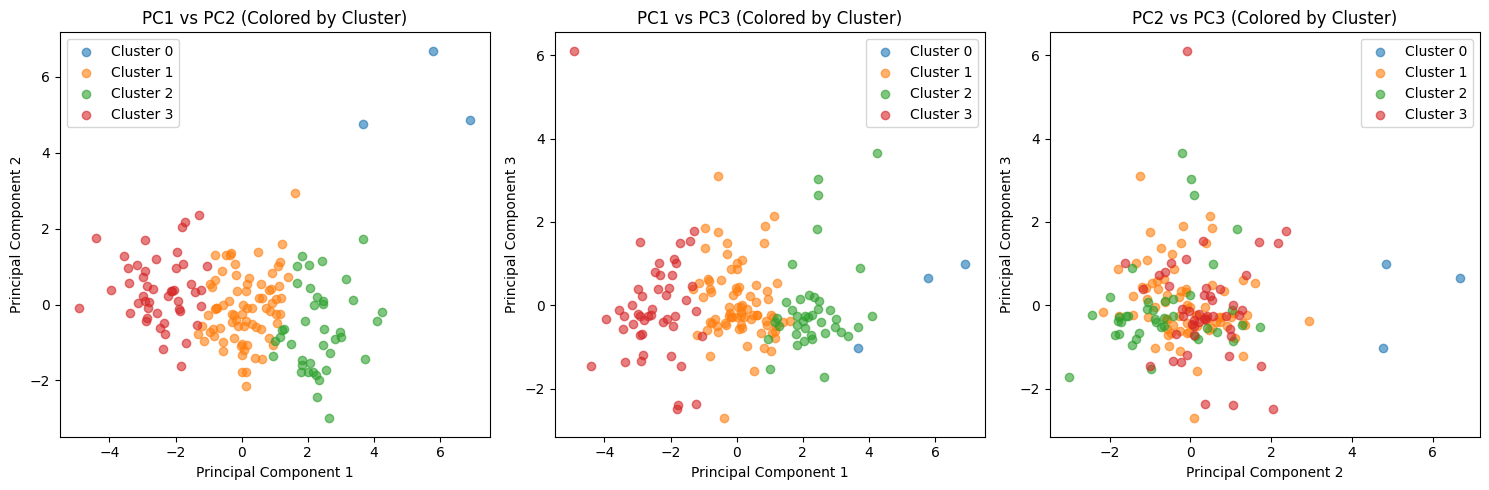

In [ ]:
# prompt: Show pairwise 2D plots for the dimension-reduced data, colour-coded by cluster assign-
# ment.

# Assuming 'principal_df' (3D reduced data), 'labels_3d' (cluster assignments), and matplotlib are available.

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for i in range(4):
    plt.scatter(principal_df['PC1'][labels_3d == i], principal_df['PC2'][labels_3d == i], label=f"Cluster {i}", alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 (Colored by Cluster)')
plt.legend()

plt.subplot(1, 3, 2)
for i in range(4):
    plt.scatter(principal_df['PC1'][labels_3d == i], principal_df['PC3'][labels_3d == i], label=f"Cluster {i}", alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PC1 vs PC3 (Colored by Cluster)')
plt.legend()

plt.subplot(1, 3, 3)
for i in range(4):
    plt.scatter(principal_df['PC2'][labels_3d == i], principal_df['PC3'][labels_3d == i], label=f"Cluster {i}", alpha=0.6)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PC2 vs PC3 (Colored by Cluster)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Compare clustering results across:
# • Original high-dimensional clustering

# Assuming 'labels' (from original high-dimensional clustering) and 'labels_3d' (from 3D PCA clustering) are available

# Calculate the adjusted Rand index
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(labels, labels_3d)
print(f"Adjusted Rand Index: {ari}")


# Calculate other metrics such as:
# - Homogeneity
# - Completeness
# - V-measure
from sklearn.metrics import homogeneity_completeness_v_measure

homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels, labels_3d)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

# Calculate the silhouette score
from sklearn.metrics import silhouette_score
import numpy as np

# For the high-dimensional clustering (original data)
silhouette_avg_original = silhouette_score(X, labels)
print(f"Silhouette score for the original clustering: {silhouette_avg_original}")


# For the PCA-reduced 3D clustering (projected_data)
silhouette_avg_pca = silhouette_score(principal_df, labels_3d) # Use 'principal_df' here
print(f"Silhouette score for the PCA-reduced clustering: {silhouette_avg_pca}")


Adjusted Rand Index: 0.7523739463920379
Homogeneity: 0.7589686403222603
Completeness: 0.7327838913258227
V-measure: 0.745646455226955
Silhouette score for the original clustering: 0.29595170577528157
Silhouette score for the PCA-reduced clustering: 0.2958515074745071


In [ ]:
# prompt: 2D PCA clustering

import matplotlib.pyplot as plt
# Assuming 'principal_df' (3D reduced data), 'labels_3d' (cluster assignments), and matplotlib are available.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(principal_df['PC1'][labels_3d == i], principal_df['PC2'][labels_3d == i], principal_df['PC3'][labels_3d == i], label=f"Cluster {i}", alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Clustering')
ax.legend()
plt.show()


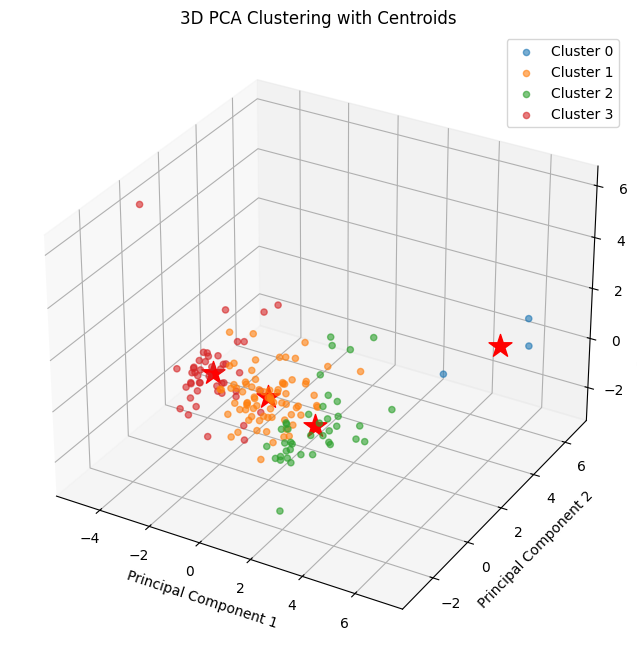

In [ ]:
# prompt: 3D PCA clustering

import matplotlib.pyplot as plt
# Assuming 'principal_df' (3D reduced data), 'labels_3d' (cluster assignments), and matplotlib are available.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(principal_df['PC1'][labels_3d == i], principal_df['PC2'][labels_3d == i], principal_df['PC3'][labels_3d == i], label=f"Cluster {i}", alpha=0.6)
    ax.scatter(centroids_3d[i,0], centroids_3d[i,1], centroids_3d[i,2], marker='*', s=300, c='red') # Plot centroids

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Clustering with Centroids')
ax.legend()
plt.show()


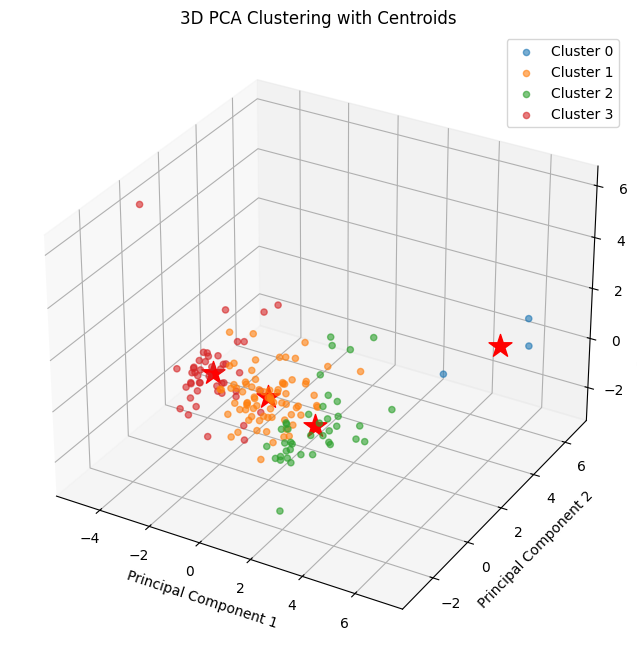

In [ ]:
# prompt: Provide visualizations that effectively communicate the results.

import matplotlib.pyplot as plt

# Assuming 'principal_df' (3D reduced data), 'labels_3d' (cluster assignments), and matplotlib are available.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(principal_df['PC1'][labels_3d == i], principal_df['PC2'][labels_3d == i], principal_df['PC3'][labels_3d == i], label=f"Cluster {i}", alpha=0.6)
    ax.scatter(centroids_3d[i,0], centroids_3d[i,1], centroids_3d[i,2], marker='*', s=300, c='red') # Plot centroids

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Clustering with Centroids')
ax.legend()
plt.show()


In [ ]:
# prompt: Consider the following data points from a mixture of two univariate Gaussian distributions:
# −0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
# 0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22
# Implement the Expectation–Maximization Algorithm to find the maximum likelihood estimates
# of the means and variances of the two Gaussians.

import numpy as np

def em_algorithm(data, k=2, max_iter=100, tol=1e-4):
    """
    Expectation-Maximization algorithm for Gaussian Mixture Models.

    Args:
        data: A 1D numpy array of data points.
        k: The number of Gaussian components.
        max_iter: The maximum number of iterations.
        tol: The convergence tolerance.

    Returns:
        A tuple containing the means, variances, and weights of the Gaussian components.
    """

    n = len(data)
    # Initialize parameters randomly
    means = np.random.choice(data, size=k, replace=False)
    variances = np.random.rand(k)  # Initialize variances randomly
    weights = np.ones(k) / k  # Initialize weights equally

    for _ in range(max_iter):
        # E-step
        responsibilities = np.zeros((n, k))
        for i in range(n):
            for j in range(k):
                responsibilities[i, j] = weights[j] * np.exp(-(data[i]-means[j])**2/(2*variances[j]))
            responsibilities[i,:] /= np.sum(responsibilities[i,:]) #normalize

        # M-step
        N_k = np.sum(responsibilities, axis=0)
        new_means = np.sum(responsibilities * data[:,np.newaxis], axis=0) / N_k
        new_variances = np.sum(responsibilities * (data[:,np.newaxis]-means)**2, axis=0) / N_k
        new_weights = N_k/n

        # Check for convergence
        if np.max(np.abs(means - new_means)) < tol and np.max(np.abs(variances - new_variances)) < tol:
            break
        means = new_means
        variances = new_variances
        weights = new_weights

    return means, variances, weights

# Example usage
data = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])

means, variances, weights = em_algorithm(data)

print("Means:", means)
print("Variances:", variances)
print("Weights:", weights)


Means: [2.6745 0.06  ]
Variances: [3.96777475e+00 1.61234421e-06]
Weights: [1.00000000e+00 6.09337578e-26]


In [ ]:
import itertools
import numpy as np

def can_shatter(hypothesis_class, points, hypothesis_func): # Added hypothesis_func parameter
    n = len(points)
    # Generate all possible labelings (0/1 sequences of length n)
    labelings = list(itertools.product([0, 1], repeat=n))

    for labeling in labelings:
        # Check if there exists a hypothesis that achieves this labeling
        # Use hypothesis_func instead of hyp
        if not any(np.array_equal(hypothesis_func(points, params), labeling) for params in hypothesis_class(points)):
            return False
    return True

# ... (rest of the code is the same) ...

# Shatter test
def test_vc(hypothesis_class, param_func, hypothesis_func, max_points=5): # hypothesis_func passed as parameter
    for n in range(1, max_points+2):
        points = np.linspace(0, 10, n)
        # Pass hypothesis_func to can_shatter
        if can_shatter(lambda pts: param_func(pts), points, hypothesis_func):
            print(f"{n} points can be shattered.")
        else:
            print(f"VC dimension is {n-1}")
            break

# ... (rest of the code is the same) ...

In [ ]:
import itertools
import numpy as np

def can_shatter(param_func, hypothesis_func, points):
    n = len(points)
    # Generate all possible labelings (0/1 sequences of length n)
    labelings = list(itertools.product([0, 1], repeat=n))

    for labeling in labelings:
        # Check if there exists a hypothesis (with some parameter setting) achieving this labeling
        if not any(np.array_equal(hypothesis_func(points, params), labeling) for params in param_func(points)):
            return False
    return True

# Hypothesis classes
def h1(points, a):
    return np.array([1 if x > a else 0 for x in points])

def h2(points, params):
    a, b = params
    return np.array([1 if a < x < b else 0 for x in points])

def h3(points, a):
    return np.array([1 if a * np.sin(x) > 0 else 0 for x in points])

def h4(points, a):
    return np.array([1 if np.sin(x + a) > 0 else 0 for x in points])

# Parameter spaces
def h1_params(points):
    thresholds = sorted(set(points))
    params = [-np.inf] + thresholds + [np.inf]
    return params

def h2_params(points):
    thresholds = sorted(set(points))
    params = [(-np.inf, np.inf)]
    for i in range(len(thresholds)):
        for j in range(i+1, len(thresholds)):
            params.append( (thresholds[i], thresholds[j]) )
    return params

def h3_params(points):
    return [-1, 1]  # a can be positive or negative to flip sign

def h4_params(points):
    samples = np.linspace(-np.pi, np.pi, 100)
    return samples

# Shatter test
def test_vc(param_func, hypothesis_func, max_points=5):
    for n in range(1, max_points+2):
        points = np.linspace(0, 10, n)
        if can_shatter(param_func, hypothesis_func, points):
            print(f"{n} points can be shattered.")
        else:
            print(f"VC dimension is {n-1}")
            break

print("VC dimension for h(x) = 1{a < x}:")
test_vc(h1_params, h1)

print("\nVC dimension for h(x) = 1{a < x < b}:")
test_vc(h2_params, h2)

print("\nVC dimension for h(x) = 1{a sin x > 0}:")
test_vc(h3_params, h3)

print("\nVC dimension for h(x) = 1{sin(x + a) > 0}:")
test_vc(h4_params, h4)


VC dimension for h(x) = 1{a < x}:
1 points can be shattered.
VC dimension is 1

VC dimension for h(x) = 1{a < x < b}:
VC dimension is 0

VC dimension for h(x) = 1{a sin x > 0}:
VC dimension is 0

VC dimension for h(x) = 1{sin(x + a) > 0}:
1 points can be shattered.
2 points can be shattered.
VC dimension is 2
